In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

samplerate:  44100


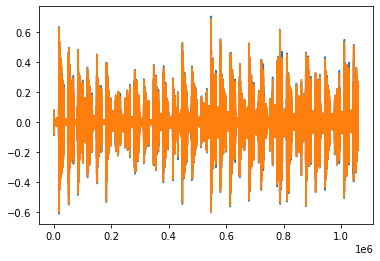

In [2]:
channels, sample_rate = sf.read("audio_input.wav")
print("samplerate: ", sample_rate)
plt.plot(channels)

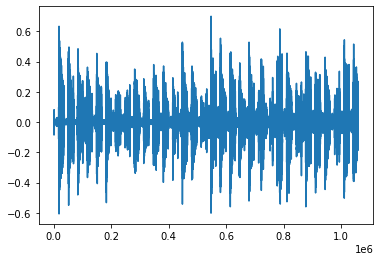

In [3]:
mono = np.mean(channels, axis = 1)
plt.plot(mono)

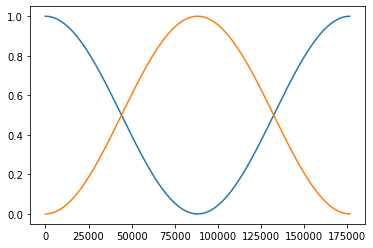

In [4]:
oscillations_per_second = 0.25
samples_per_cosine = int(sample_rate / oscillations_per_second)
ch1_carrier = np.cos(np.linspace(0, np.pi * 2, samples_per_cosine)) * 0.5 + 0.5
ch2_carrier = ch1_carrier * -1 + 1
plt.plot(ch1_carrier)
plt.plot(ch2_carrier)

In [5]:
def dot_product_fuckyly(long, short):
    length_long = len(long)
    length_short = len(short)
    result = np.zeros(length_long)
    for i in range(length_long):
        result[i] = long[i] * short[i % length_short]
    return result

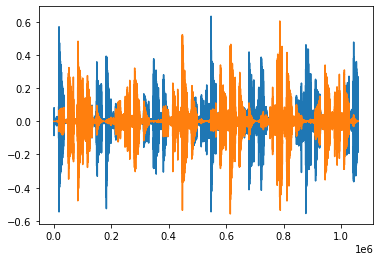

In [6]:
ch1 = dot_product_fuckyly(mono, ch1_carrier)
ch2 = dot_product_fuckyly(mono, ch2_carrier)
eight_dimensional_audio = np.stack((ch1, ch2), axis = 1)
plt.plot(eight_dimensional_audio)

In [7]:
sf.write("audio_output.wav", eight_dimensional_audio, sample_rate)